#📌 Extracción

In [323]:
import pandas as pd
datos = pd.read_json('TelecomX_Data.json')
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [324]:

from pandas import json_normalize
df_customer = json_normalize(datos['customer'])
df_phone = json_normalize(datos['phone'])
df_internet = json_normalize(datos['internet'])
df_account = json_normalize(datos['account'])

# Unir con el DataFrame original
df_final = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']), df_customer, df_phone, df_internet, df_account], axis=1)
datos = df_final


In [325]:
pd.unique(datos['gender'])

array(['Female', 'Male'], dtype=object)

In [326]:
datos.columns = datos.columns.str.lower().str.replace(' ', '_')
datos.head()



,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [327]:
datos['Cuentas_Diarias'] = datos['charges.monthly']/30
datos['partner'] =datos['partner'].replace({'Yes': 1, 'No': 0})
datos['churn'] = datos['churn'].replace({'': 'Yes'})
datos['dependents'] =datos['dependents'].replace({'Yes': 1, 'No': 0})
datos['paperlessbilling'] =datos['paperlessbilling'].replace({'Yes': 1, 'No': 0})
datos['charges.total'] = pd.to_numeric(datos['charges.total'], errors='coerce')


<ipython-input-327-780db9ac749b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['partner'] =datos['partner'].replace({'Yes': 1, 'No': 0})
<ipython-input-327-780db9ac749b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['dependents'] =datos['dependents'].replace({'Yes': 1, 'No': 0})
<ipython-input-327-780db9ac749b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

In [328]:
col_servicios = ['phoneservice',	'multiplelines',	'internetservice',	'onlinebackup',	'deviceprotection',	'techsupport',	'streamingtv',	'streamingmovies']

# Crear nueva columna con la cantidad de "sí" por fila
datos['total_servicios'] = datos[col_servicios].apply(lambda fila: (fila == 'Yes').sum(), axis=1)
datos.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,Cuentas_Diarias,total_servicios
0,0002-ORFBO,No,Female,0,1,1,9,Yes,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,4
1,0003-MKNFE,No,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3
2,0004-TLHLJ,Yes,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2
3,0011-IGKFF,Yes,Male,1,1,0,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,5
4,0013-EXCHZ,Yes,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,3


In [329]:
datos['charges.monthly'].describe()
datos['charges.total'].describe()

,charges.total
count,7256.000000
mean,2280.634213
std,2268.632997
min,18.800000
25%,400.225000
50%,1391.000000
75%,3785.300000
max,8684.800000


In [330]:
datos['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


#📊 Carga y análisis

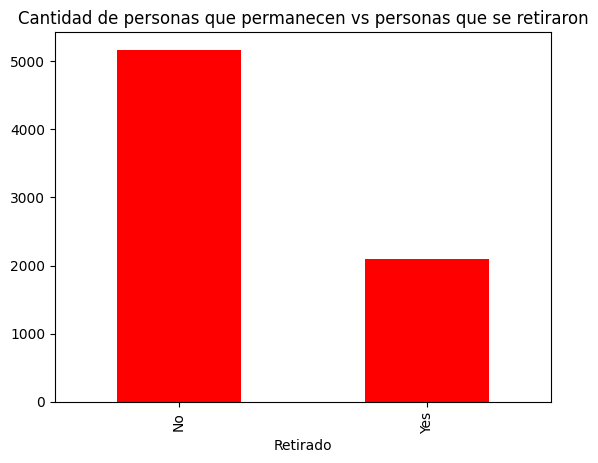

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos['churn'].value_counts().plot(kind = 'bar', color ='red')
plt.title('Cantidad de personas que permanecen vs personas que se retiraron')
plt.xlabel('Retirado')
plt.savefig('1.png')
plt.show()

# Variables categoricas

<ipython-input-332-6026234fa0a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abandono_genero, x='gender', palette='pastel')


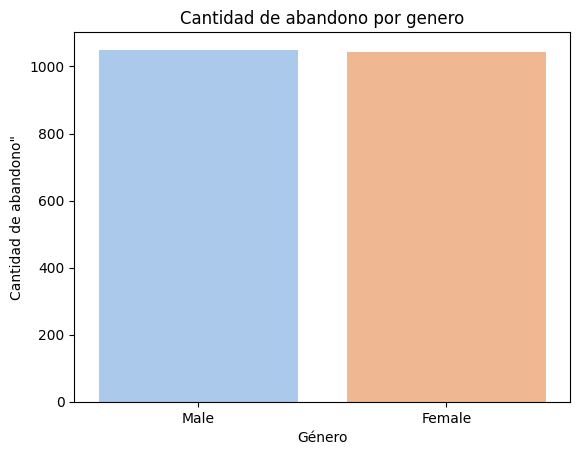

<ipython-input-332-6026234fa0a1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abandono_genero, x='phoneservice', palette='pastel')


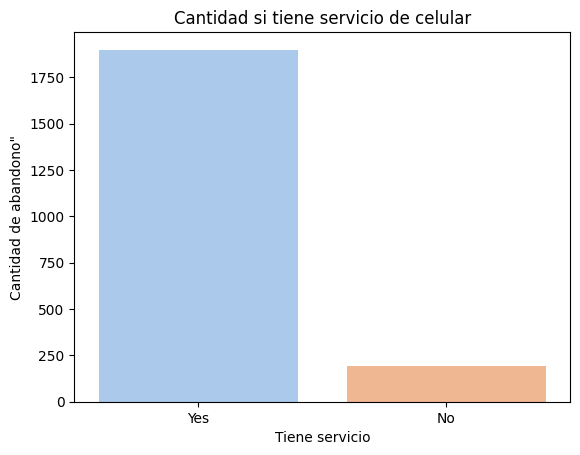

<Figure size 640x480 with 0 Axes>

In [332]:

abandono_genero = datos[datos['churn'] == 'Yes']

sns.countplot(data=abandono_genero, x='gender', palette='pastel')
plt.title('Cantidad de abandono por genero')
plt.xlabel('Género')
plt.ylabel('Cantidad de abandono"')
plt.show()
plt.savefig('2.png')
abandono_genero = datos[datos['churn'] == 'Yes']

sns.countplot(data=abandono_genero, x='phoneservice', palette='pastel')
plt.title('Cantidad si tiene servicio de celular')
plt.xlabel('Tiene servicio')
plt.ylabel('Cantidad de abandono"')
plt.show()
plt.savefig('3.png')


<ipython-input-333-25cb758afe00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abandono_genero, x='contract', palette='pastel')


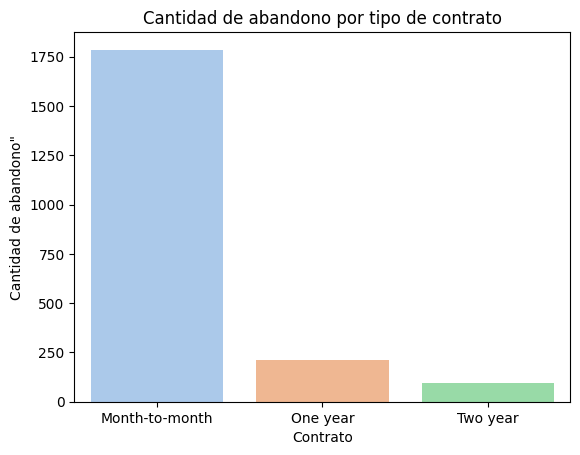

<Figure size 640x480 with 0 Axes>

In [333]:

abandono_contrato = datos[datos['churn'] == 'Yes']

sns.countplot(data=abandono_genero, x='contract', palette='pastel')
plt.title('Cantidad de abandono por tipo de contrato')
plt.xlabel('Contrato')
plt.ylabel('Cantidad de abandono"')
plt.show()
plt.savefig('4.png')


<ipython-input-334-195ac8061ef0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abandono_genero, x='paymentmethod', palette='pastel')


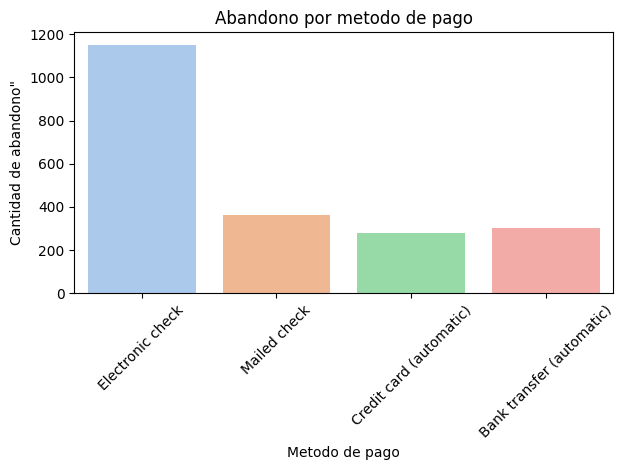

<Figure size 640x480 with 0 Axes>

In [334]:
abandono_pago = datos[datos['churn'] == 'Yes']
sns.countplot(data=abandono_genero, x='paymentmethod', palette='pastel')
plt.title('Abandono por metodo de pago')
plt.xlabel('Metodo de pago')
plt.ylabel('Cantidad de abandono"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('5.png')

<ipython-input-335-40212fcee5b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abandono_genero, x='internetservice', palette='pastel')


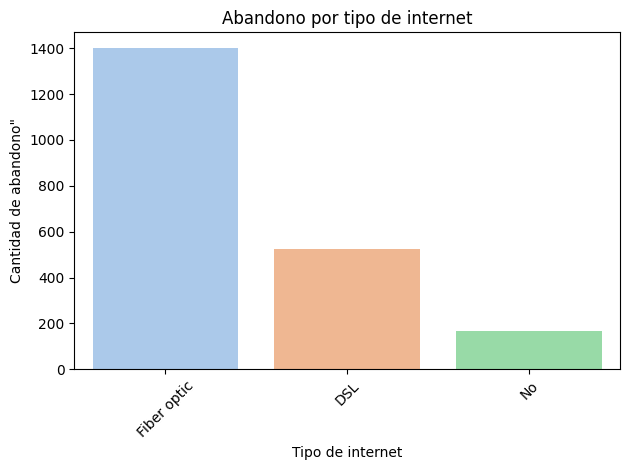

<Figure size 640x480 with 0 Axes>

In [335]:
abandono_pago = datos[datos['churn'] == 'Yes']
sns.countplot(data=abandono_genero, x='internetservice', palette='pastel')
plt.title('Abandono por tipo de internet')
plt.xlabel('Tipo de internet')
plt.ylabel('Cantidad de abandono"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('6.png')

<ipython-input-336-1e84785114cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abandono_genero, x='streamingmovies', palette='pastel')


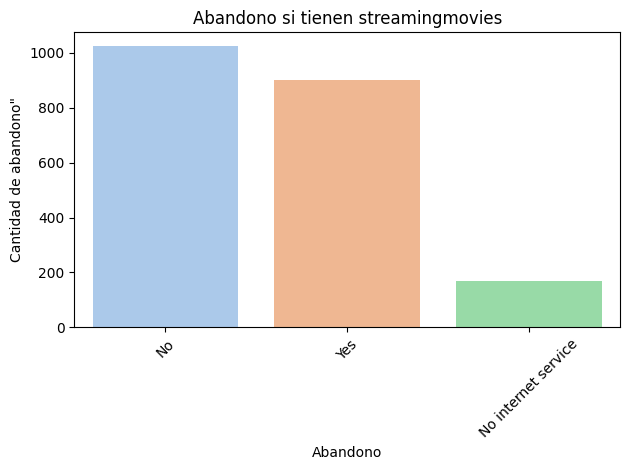

<Figure size 640x480 with 0 Axes>

In [336]:
abandono_pago = datos[datos['churn'] == 'Yes']
sns.countplot(data=abandono_genero, x='streamingmovies', palette='pastel')
plt.title('Abandono si tienen streamingmovies')
plt.xlabel('Abandono')
plt.ylabel('Cantidad de abandono"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('7.png')


# Variables numericas


<ipython-input-343-36fa5d6d34c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='churn', y='charges.monthly', palette='Set2')


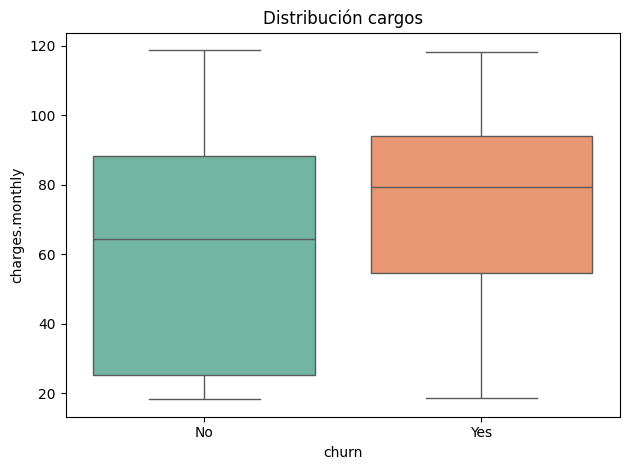

<Figure size 640x480 with 0 Axes>

In [343]:
sns.boxplot(data=datos, x='churn', y='charges.monthly', palette='Set2')
plt.title('Distribución cargos')
plt.tight_layout()
plt.show()
plt.savefig('8.png')

<ipython-input-338-18fb6f003665>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='churn', y='charges.total', palette='Set2')


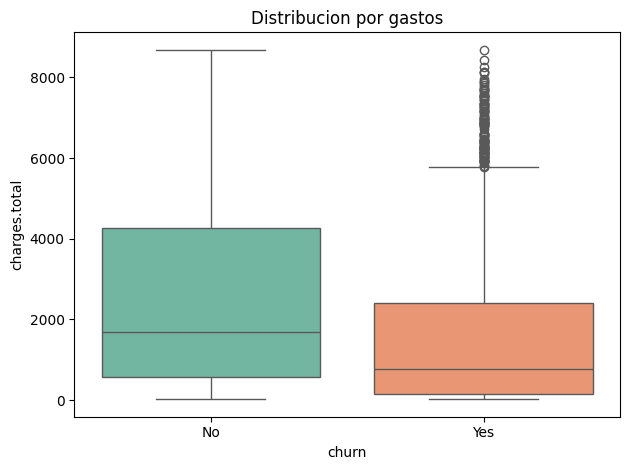

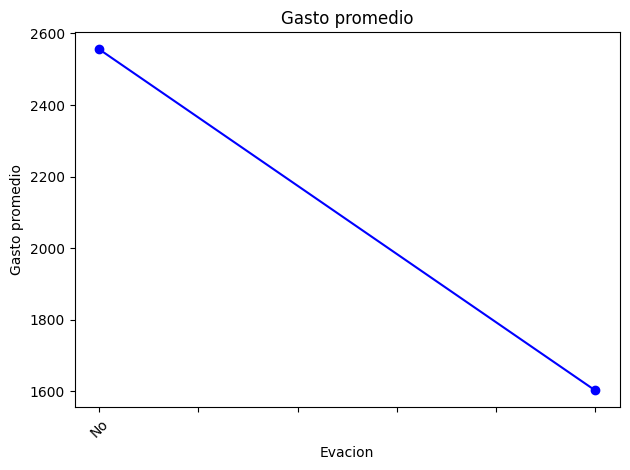

<Figure size 640x480 with 0 Axes>

In [338]:
sns.boxplot(data=datos, x='churn', y='charges.total', palette='Set2')
plt.title('Distribucion por gastos')
plt.tight_layout()
plt.show()
plt.savefig('9.png')
medias = datos.groupby('churn')['charges.total'].mean()

# Graficar
medias.plot(kind='line', marker='o', color='blue')
plt.title('Gasto promedio')
plt.xlabel('Evacion')
plt.ylabel('Gasto promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('10.png')


<ipython-input-339-20564254e6c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='churn', y='tenure', palette='Set2')


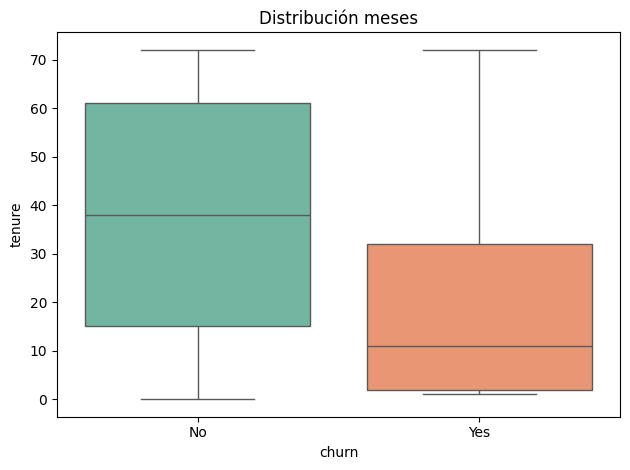

<Figure size 640x480 with 0 Axes>

In [339]:
sns.boxplot(data=datos, x='churn', y='tenure', palette='Set2')
plt.title('Distribución meses')
plt.tight_layout()
plt.show()
plt.savefig('11.png')

# Correlacion

Correlación entre evacion y genero: 0.18


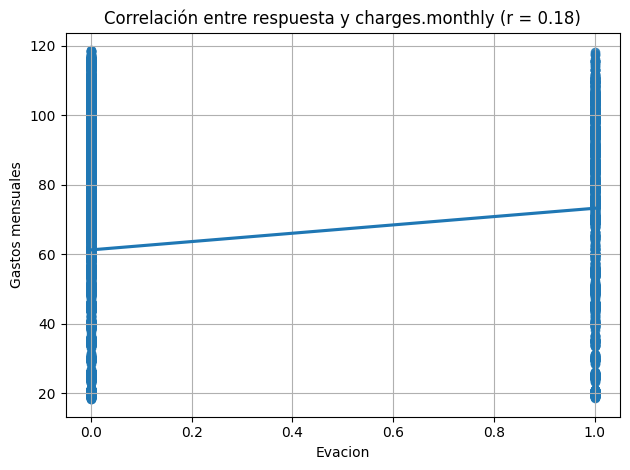

In [340]:

datos['Evacion'] = datos['churn'].map({'Yes': 1, 'No': 0})
correlacion = datos['charges.monthly'].corr(datos['Evacion'])
print(f'Correlación entre evacion y genero: {correlacion:.2f}')

sns.regplot(data=datos, x='Evacion', y='charges.monthly', logistic=False, ci=None, marker='o')
plt.title(f'Correlación entre respuesta y charges.monthly (r = {correlacion:.2f})')
plt.xlabel('Evacion')
plt.ylabel('Gastos mensuales')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlación entre evacion y cantidad de servicios: -0.03


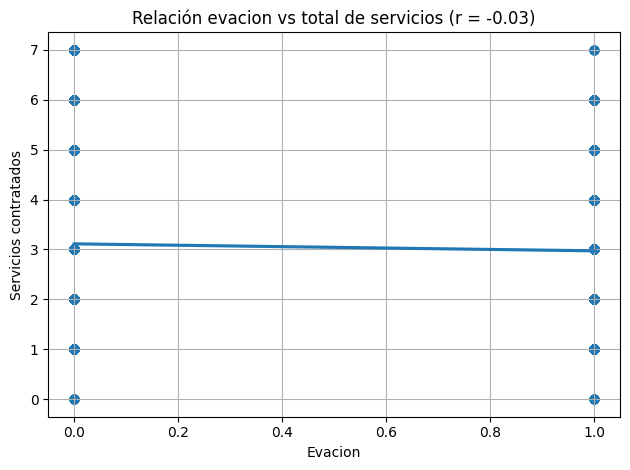

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,Cuentas_Diarias,total_servicios,Evacion
0,0002-ORFBO,No,Female,0,1,1,9,Yes,No,DSL,...,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,4,0
1,0003-MKNFE,No,Male,0,0,0,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3,0
2,0004-TLHLJ,Yes,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2,1
3,0011-IGKFF,Yes,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,5,1
4,0013-EXCHZ,Yes,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,3,1


In [341]:

correlacion = datos['total_servicios'].corr(datos['Evacion'])
print(f'Correlación entre evacion y cantidad de servicios: {correlacion:.2f}')
sns.regplot(data=datos, x='Evacion', y='total_servicios', logistic=False, ci=None, marker='o')
plt.title(f'Relación evacion vs total de servicios (r = {correlacion:.2f})')
plt.xlabel('Evacion')
plt.ylabel('Servicios contratados')
plt.grid(True)
plt.tight_layout()
plt.show()
datos.head()

#📄Informe final

La empresa esta teniendo una problematica, ya que una cantidad importante de perdida de clientes, por lo que nos hemos comprometido a realizar un analisis
de las variables que estan afectando para atacar la causa raiz del problema y mejorar las condiciones del servicio.


Al importar los datos con la libreria de pandas, se nota que habian columnas con informacion relevante contenidas en diccionarios, lo que hace mas complicado el realizar el analisis de los datos. Por lo tanto se utilizo la funcion 'Normalize' para extraer la informacion y dejarla ordenada en las
columnas.

Por otra parte, se encontro que habian valores dentro de la columna 'churn' que no eran 'Yes' o 'No', y se decidio tratar como valores que han dejado de ser clientes ante la falta de informacion, ademas se ha creado una nueva columna donde se suman la cantidad de servicios contratados por lo clientes para aplicar estadisticas de correlacion y analizar mas a fondo los datos.

1.1 Primeramente se ha encontrado que al menos un 25% de los clientes se han ido y dejaron el servicio, lo cual se puede ver en el siguiente grafico

<img src="1.png" width="800">

1.2 Por lo que con los datos sumistrados se hizo una disticion de variables categoricas, donde se ha encontrado que, el genero no influye en el abandono de la compania.
<img src="2.png" width="800">
Pero el tipo de contrato si tiene un impacto, la mayoria de las personas que se han dado de baja son personas que tienen contractos de mes a mes, es probable que lo que este sucediendo es que prueban el servicio y no les parece suficientemente bueno por lo que lo dejan pronto, personas con contratos mayores son mas fieles a la compania.
<img src="3.png" width="800">
Ademas, personas con el tipo de internet de fibra optica han desistido en su mayoria por el servicio, para la compania seria bueno revisar el servicio que esta ofreciendo, si y verificar si es porque le falta velocidad o no es lo que los clientes esperan. Deben realizar una voz del cliente
<img src='6.png' width='800'>


1.3 Ahora bien, viendo las variables numericas, se comparan la cantidad de clientes contra la facturacion mensual, y en el grafico <img src='9.png' width='800'> se logra observar que los clientes con mayores cargos son los que dejan el servicio, y juntando este analisis con el gasto total por cliente en el grafico <img src='10.png' width>, hay una variable comun, la retencion del cliente esta fallando, lo clientes llegan, prueban el servicio y lo dejan, probablemente el tema del internet de fibra optica los tiene disgustados y la empresa no se ha dado cuenta.


1.4 Se le recomienda a la empresa realizar encuentas si han tenido problemas con el internet, y para identificar oportunidades de mejora que puedan aparecer con respecto a este tema, otra situacion a investigar, es que ha estado pasando con las personas que tienen el metodo de pago por cheque electronico, por que estas personas tienen una tendencia mas alta para dejar la compania. Y lo mas importante que debe indentificar la empresa, es por que los clientes se van tan rapido, lo mas probable es que el servicio no cumple con las expectativas.






